In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Hyper parameter tuning
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

Using TensorFlow backend.


In [14]:
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [38]:
%matplotlib inline 
image_index = 2603
print(y_train[image_index])

3


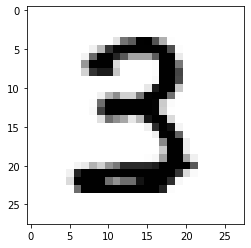

In [39]:
plt.imshow(x_train[image_index], cmap='Greys')

In [5]:
x_train.shape

(60000, 28, 28)

In [36]:
#Adding random noise to the images
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

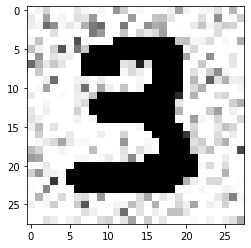

In [40]:
plt.imshow(x_train_noisy[image_index], cmap='Greys')

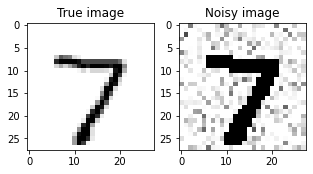

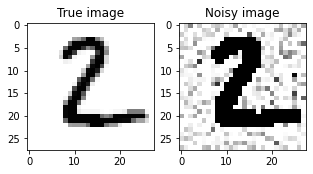

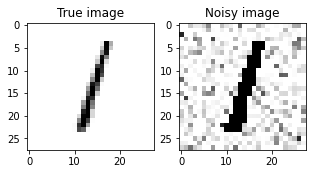

In [17]:
n = 3
for i in range(n):
    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(5, 5)
    axes[0].set_title('True image')
    im0 = axes[0].imshow(x_test[i], cmap='Greys')
    axes[1].set_title('Noisy image')
    im1 = axes[1].imshow(x_test_noisy[i], cmap='Greys')

In [44]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train_noisy = x_train_noisy.reshape(x_train_noisy.shape[0], 28, 28, 1)
x_test_noisy = x_test_noisy.reshape(x_test_noisy.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train_noisy = x_train_noisy.astype('float32')
x_test_noisy = x_test_noisy.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train_noisy /= 255
x_test_noisy /= 255
print('x_train shape:', x_train_noisy.shape)
print('Number of images in x_train', x_train_noisy.shape[0])
print('Number of images in x_test', x_test_noisy.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [47]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [48]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train_noisy,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 337us/sample - loss: 0.5907 - accuracy: 0.8212
Epoch 2/10
60000/60000 [==============================] - 20s 326us/sample - loss: 0.2501 - accuracy: 0.9243
Epoch 3/10
60000/60000 [==============================] - 23s 379us/sample - loss: 0.1921 - accuracy: 0.9416- los
Epoch 4/10
60000/60000 [==============================] - 21s 346us/sample - loss: 0.1602 - accuracy: 0.9517
Epoch 5/10
60000/60000 [==============================] - 21s 355us/sample - loss: 0.1433 - accuracy: 0.9557
Epoch 6/10
60000/60000 [==============================] - 20s 338us/sample - loss: 0.1288 - accuracy: 0.9600
Epoch 7/10
60000/60000 [==============================] - 21s 350us/sample - loss: 0.1167 - accuracy: 0.9639
Epoch 8/10
60000/60000 [==============================] - 22s 363us/sample - loss: 0.1094 - accuracy: 0.9661
Epoch 9/10
60000/60000 [==============================] - 22s 364us/sample - loss: 0.1036 - accuracy

In [49]:
model.evaluate(x_test_noisy, y_test)

10000/10000 [==============================] - 1s 123us/sample - loss: 0.0953 - accuracy: 0.9716


[0.09531202319851145, 0.9716]

5


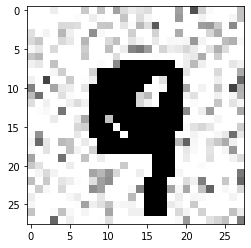

In [28]:
image_index = 4444
plt.imshow(x_test_noisy[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test_noisy[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [45]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.154067660224244))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.154067660224244))
model.add(Dense(10,activation=tf.nn.softmax))
optim = Adam(lr=10**-3)
model.compile(optimizer=optim, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train_noisy,y=y_train, epochs=10, validation_data=(x_test_noisy, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 235us/sample - loss: 0.7404 - accuracy: 0.7507 - val_loss: 0.2608 - val_accuracy: 0.9217
Epoch 2/10
60000/60000 [==============================] - 14s 241us/sample - loss: 0.2751 - accuracy: 0.9152 - val_loss: 0.1835 - val_accuracy: 0.9419
Epoch 3/10
60000/60000 [==============================] - 15s 250us/sample - loss: 0.2135 - accuracy: 0.9344 - val_loss: 0.1384 - val_accuracy: 0.9569
Epoch 4/10
60000/60000 [==============================] - 15s 247us/sample - loss: 0.1750 - accuracy: 0.9472 - val_loss: 0.1230 - val_accuracy: 0.9613
Epoch 5/10
60000/60000 [==============================] - 17s 276us/sample - loss: 0.1528 - accuracy: 0.9536 - val_loss: 0.1024 - val_accuracy: 0.9690
Epoch 6/10
60000/60000 [==============================] - 16s 262us/sample - loss: 0.1354 - accuracy: 0.9578 - val_loss: 0.1055 - val_accuracy: 0.9674
Epoch 7/10
60000/60000 [====================

In [46]:
model.evaluate(x_test_noisy, y_test)

10000/10000 [==============================] - 1s 102us/sample - loss: 0.0888 - accuracy: 0.9726


[0.08877595871975645, 0.9726]

0


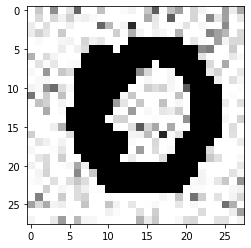

In [50]:
image_index = 4444
plt.imshow(x_train_noisy[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_train_noisy[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [51]:
def data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    noise_factor = 0.3
    x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape) 
    x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

    x_train_noisy = np.clip(x_train_noisy, 0., 1.)
    x_test_noisy = np.clip(x_test_noisy, 0., 1.)
    
    x_train_noisy = x_train_noisy.reshape(x_train_noisy.shape[0], 28, 28, 1)
    x_test_noisy = x_test_noisy.reshape(x_test_noisy.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    # Making sure that the values are float so that we can get decimal points after division
    x_train_noisy = x_train_noisy.astype('float32')
    x_test_noisy = x_test_noisy.astype('float32')
    # Normalizing the RGB codes by dividing it to the max RGB value.
    x_train_noisy /= 255
    x_test_noisy /= 255
    input_shape = (28, 28, 1)
    return x_train_noisy, y_train, x_test_noisy, y_test, input_shape

In [52]:
def model(x_train_noisy, y_train, x_test_noisy, y_test, input_shape):
    model = Sequential()
    model.add(Conv2D(28, kernel_size=(3,3), padding={{choice(['valid', 'same'])}}, input_shape=input_shape))
    model.add(MaxPooling2D(pool_size={{choice([(3,3), (2,2)])}}))
    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
    model.add(Dense({{choice([64, 128, 256])}}, activation=tf.nn.relu))
    model.add(Dropout({{uniform(0, 1)}}))
    modelChoice = {{choice(['one', 'two'])}}
    if modelChoice == 'two':
        model.add(Dense({{choice([64, 128, 256])}}, activation=tf.nn.relu))
        model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense(10,activation=tf.nn.softmax))
    choiceval = {{choice(['adam', 'rmsprop'])}}
    if choiceval == 'adam':
        optim = Adam(lr={{choice([10**-3, 10**-2, 10**-1])}})
    else:
        optim = RMSprop(lr={{choice([10**-3, 10**-2, 10**-1])}})
    model.compile(optimizer=optim, 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    model.fit(x=x_train_noisy,y=y_train, epochs=10, validation_data=(x_test_noisy, y_test))
    score, acc = model.evaluate(x_test_noisy, y_test, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

In [ ]:
best_run, best_model = optim.minimize(model=model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=10,
                                      trials=Trials(),notebook_name='2')

In [85]:
x_train, y_train, x_test, y_test, input_shape = data()
print("Best performing model chosen hyper-parameters:")
print(best_run)
print("Evalutation of best performing model:")
print(best_model.evaluate(x_test, y_test))

Best performing model chosen hyper-parameters:
{'Activation': 2, 'Activation_1': 0, 'Dense': 0, 'Dense_1': 0, 'Dropout': 0.32445680895915574, 'Dropout_1': 1, 'Dropout_2': 0.1540676602242441, 'choiceval': 0, 'kernel_size': 0, 'lr': 0, 'lr_1': 1, 'lr_2': 2, 'padding': 1, 'pool_size': 0}
Evalutation of best performing model:
10000/10000 [==============================] - 1s 134us/sample - loss: 0.0447 - accuracy: 0.9883
[0.04474290358855797, 0.9883]
